# Logistic Regression Project 

### GOAL 

the Goal of the project is to Create a Classification Model that can predict if a person has presence of heart disease or not based on some physical features of that person (age,sex, cholesterol, etc...)**


## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "target" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

#### Exploratory Data Analysis and Visualization

In [1]:
# import libraries for data visualization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in the data
df = pd.read_csv('../DATA/heart.csv')


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


there are no missing values in the dataset 

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [98]:
df["target"].unique()

array([1, 0], dtype=int64)

In [96]:
df.corr()["target"]

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

In [25]:
#visualize the relationship between the some correlating values to the target 

pairplot_df = df[["age","trestbps", "chol","thalach","target"]]
pairplot_df.head()

,age,trestbps,chol,thalach,target
0,63,145,233,150,1
1,37,130,250,187,1
2,41,130,204,172,1
3,56,120,236,178,1
4,57,120,354,163,1


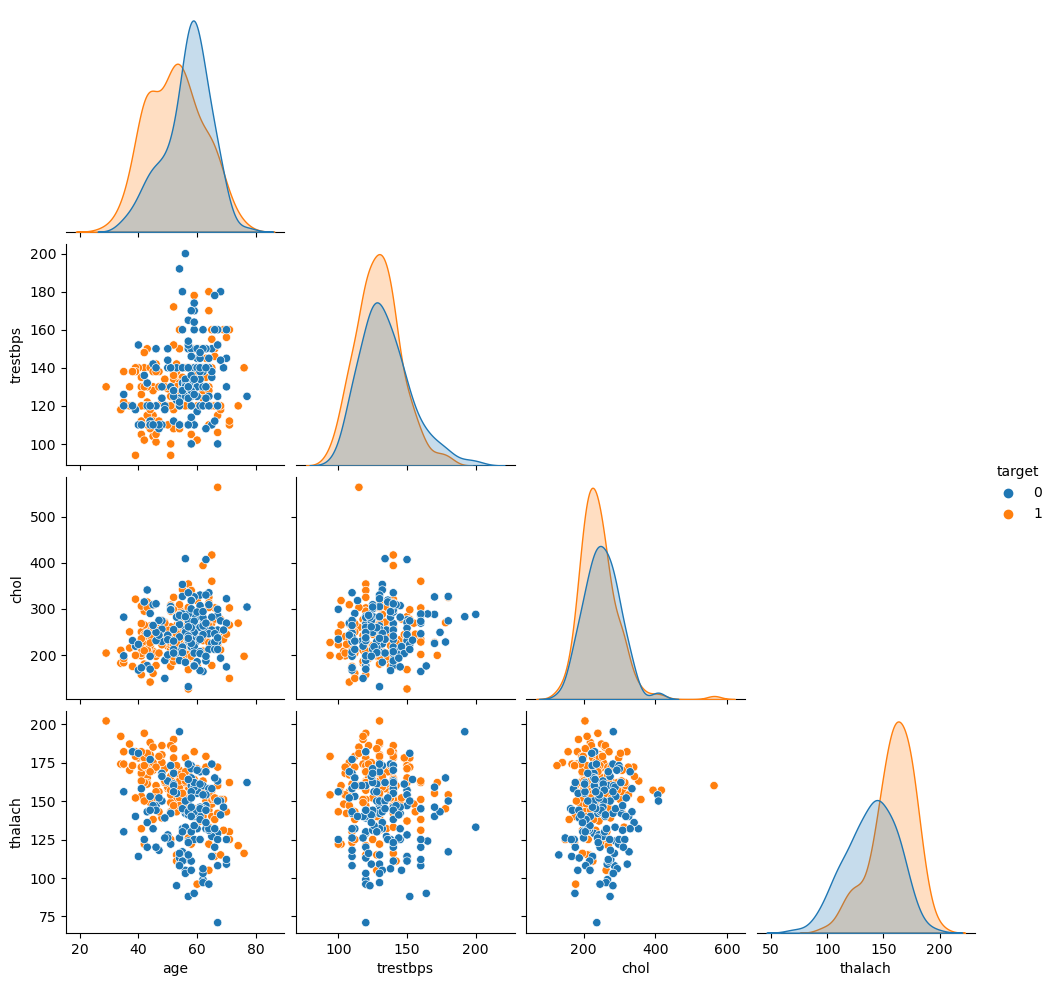

In [92]:
sns.pairplot(data=pairplot_df, hue="target", corner=True)

<Axes: xlabel='target', ylabel='count'>

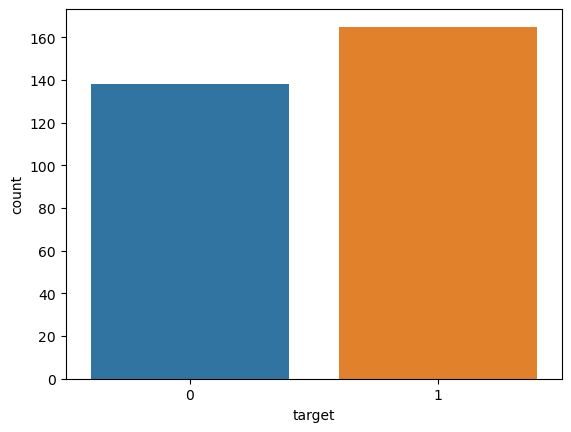

In [27]:
# visualize the balance of the target
sns.countplot(data=df, x="target")

#### Machine Learning

Train | Test Split and Scaling using scikitlearn


In [36]:
#first seperate the data into features and label
X=df.drop("target", axis=1)
y=df["target"]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=404)

In [46]:
len(X_train)


272

In [47]:
len(X_test)

31

In [51]:
# import scaler to scale the features of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

##### Logistic Regression Model

Create a Logistic Regression model, use Cross-Validation to find a well-performing C value for the hyper-parameter search.

In [48]:
from sklearn.linear_model import LogisticRegressionCV

In [93]:
# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 1, 10)
l1 = np.linspace(0, 1, 10)
log_model = LogisticRegressionCV(Cs=C, penalty="elasticnet", solver="saga", l1_ratios=l1, max_iter=1000000)

In [94]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV(Cs=array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ]),
                     l1_ratios=array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                     max_iter=1000000, penalty='elasticnet', solver='saga')

In [95]:
log_model.coef_

array([[-0.07199584, -0.78744695,  0.88402785, -0.32250555, -0.21288603,
         0.00909976,  0.19451759,  0.48687407, -0.33450547, -0.70141667,
         0.23941536, -0.76571867, -0.44311193]])

In [90]:
log_model.C_

array([1.])

In [99]:
log_model.get_params()

{'Cs': array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
         3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ]),
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 'max_iter': 1000000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'elasticnet',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0}

##### Coefficient Interpretation

These coeffecients relate to the odds and can not be directly interpreted as in linear regression.
the model was trained on a scaled version of the data
It is much easier to understand and interpret the relationship between the coefficients than it is to interpret the coefficients relationship with the probability of the target/label class.

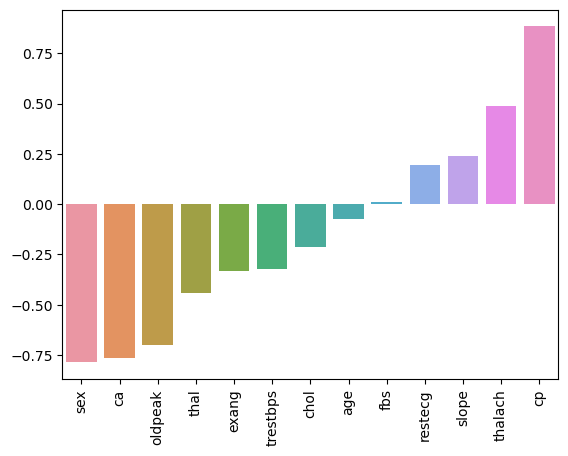

In [109]:
# plot out the coeff visually to know important features.
coefs = pd.Series(index=X.columns, data=log_model.coef_[0]).sort_values()
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation=90);

In [102]:
# get predictions
y_pred = log_model.predict(scaled_X_test)

In [67]:
# evaluate the models performance 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
accuracy_score(y_test, y_pred)

0.8387096774193549

In [63]:
confusion_matrix(y_test, y_pred)

array([[ 9,  1],
       [ 4, 17]], dtype=int64)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.94      0.81      0.87        21

    accuracy                           0.84        31
   macro avg       0.82      0.85      0.83        31
weighted avg       0.86      0.84      0.84        31



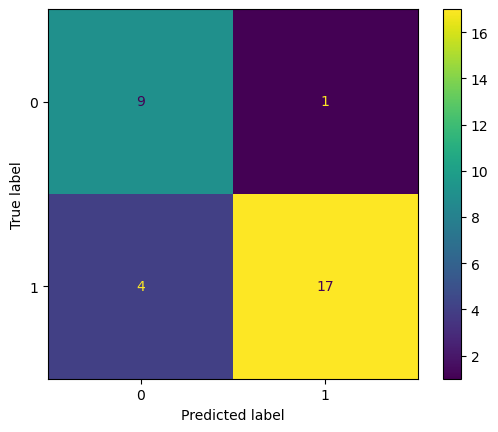

In [82]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### Test the model on a new set of features

A patient with the following features has come into the medical office:

    age: 48.0

    sex: 0.0

    cp: 2.0

    trestbps: 130.0

    chol: 275.0

    fbs: 0.0

    restecg: 1.0

    thalach: 139.0

    exang: 0.0

    oldpeak:0.2

    slope: 2.0

    ca: 0.0

    thal: 2.0

What does the model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?


In [110]:
# create an array of the features of the patient
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [111]:
log_model.predict(patient)

array([0], dtype=int64)

In [112]:
# the model predicted that the patient most probably doesnt have a heart desease.
# we can confirm the probability

log_model.predict_proba(patient)

array([[1.00000000e+00, 7.90880776e-24]])

#### save the model

In [113]:
from joblib import dump
dump(log_model, 'heart_diesease_detection_model.joblib') 

['heart_diesease_detection_model.joblib']